In [1]:
pip install --user ultralytics

In [2]:
from ultralytics import YOLO
from PIL import Image
import torch
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
model = YOLO("yolov8m.pt")

In [4]:
from PIL import Image

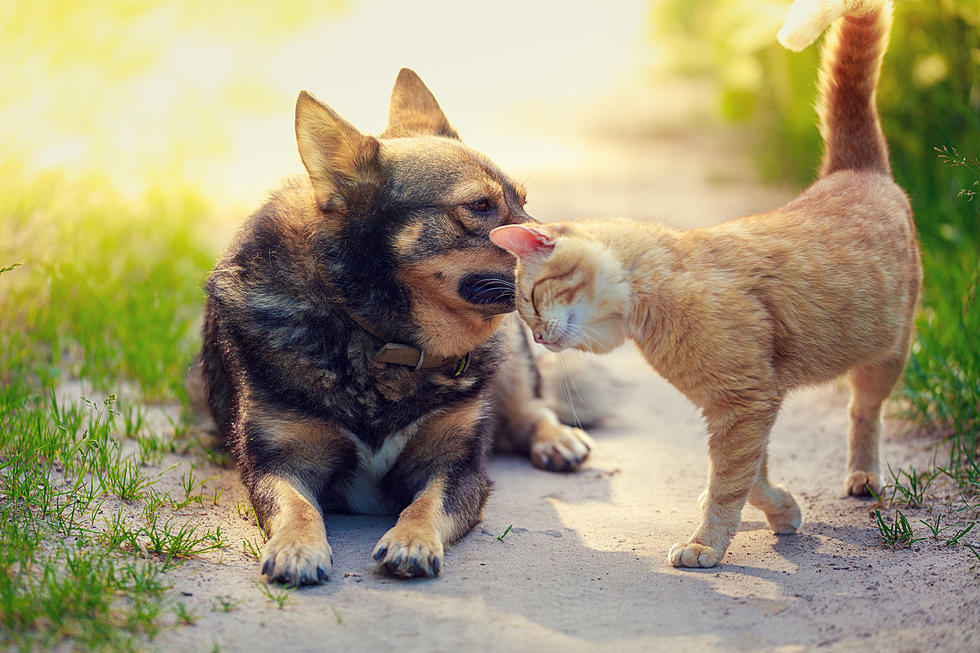

In [17]:
url = "pet.jpg"
img = Image.open(url)
img

In [18]:
width, height = img.size
width, height

(980, 653)

In [19]:
results = model.predict(url)


image 1/1 C:\Users\USER\pet.jpg: 448x640 1 cat, 1 dog, 3503.6ms
Speed: 14.6ms preprocess, 3503.6ms inference, 5.3ms postprocess per image at shape (1, 3, 448, 640)


In [20]:
result = results[0]

In [21]:
len(result.boxes)

2

In [22]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([15., 16.])
conf: tensor([0.9443, 0.5302])
data: tensor([[4.8877e+02, 9.7979e-01, 9.2547e+02, 5.7025e+02, 9.4435e-01, 1.5000e+01],
        [1.9688e+02, 6.4756e+01, 5.7043e+02, 5.8792e+02, 5.3021e-01, 1.6000e+01]])
id: None
is_track: False
orig_shape: (653, 980)
shape: torch.Size([2, 6])
xywh: tensor([[707.1191, 285.6148, 436.7037, 569.2700],
        [383.6523, 326.3361, 373.5460, 523.1594]])
xywhn: tensor([[0.7216, 0.4374, 0.4456, 0.8718],
        [0.3915, 0.4997, 0.3812, 0.8012]])
xyxy: tensor([[488.7673,   0.9798, 925.4709, 570.2498],
        [196.8793,  64.7564, 570.4253, 587.9158]])
xyxyn: tensor([[0.4987, 0.0015, 0.9444, 0.8733],
        [0.2009, 0.0992, 0.5821, 0.9003]])

In [23]:
print("Object type:", result.boxes.cls)
print("Coordinates:", result.boxes.xyxy)
print("Probability:", result.boxes.conf)

Object type: tensor([15., 16.])
Coordinates: tensor([[488.7673,   0.9798, 925.4709, 570.2498],
        [196.8793,  64.7564, 570.4253, 587.9158]])
Probability: tensor([0.9443, 0.5302])


#first class

In [24]:
print("Object type:", result.boxes.cls[0])
print("Coordinates:", result.boxes.xyxy[0])
print("Probability:", result.boxes.conf[0])

Object type: tensor(15.)
Coordinates: tensor([488.7673,   0.9798, 925.4709, 570.2498])
Probability: tensor(0.9443)


In [25]:
#uNPACK LIST AND VALUES
cords =result.boxes.xyxy[0].tolist()
class_id =result.boxes.cls[0].item()
conf = result.boxes.conf[0].item()

print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 15.0
Coordinates: [488.76727294921875, 0.9797887802124023, 925.470947265625, 570.249755859375]
Probability: 0.9443466663360596


In [26]:
for box in result.boxes:
    cords =box.xyxy[0].tolist()
    class_id =box.cls[0].item()
    conf = box.conf[0].item()
    
    print("Object type:",result.names[class_id],"(",class_id,")")
    print("Coordinates:", [round(cord,2) for cord in cords])
    print("Probability:", round(conf,2))
    print("------------------")

Object type: cat ( 15.0 )
Coordinates: [488.77, 0.98, 925.47, 570.25]
Probability: 0.94
------------------
Object type: dog ( 16.0 )
Coordinates: [196.88, 64.76, 570.43, 587.92]
Probability: 0.53
------------------


In [27]:
image = np.array(img) # convert image to array
for box in result.boxes:
    cords =box.xyxy[0].tolist()
    class_id =box.cls[0].item()
    conf = box.conf[0].item()
    
    start = (int(cords[0]),int(cords[1])) # x0, y0
    end   = (int(cords[2]),int(cords[3])) # x1, y1

    cv2.rectangle(image,start,end,(0,200,0),thickness=2)
    cv2.putText(image, result.names[class_id], (start[0]+15,start[1]+30), cv2.FONT_HERSHEY_SIMPLEX,0.9, (10,0,10), 2)# show detection objects on image

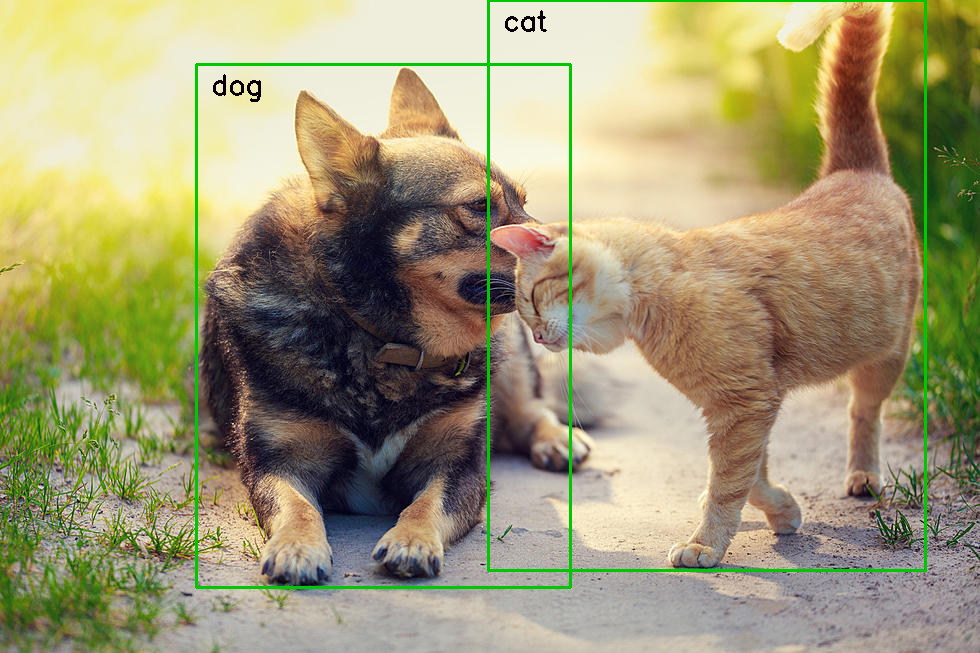

In [28]:
Image.fromarray(image)

In [29]:
# import matplotlib.pyplot as plt

# # Assuming you have variables `epochs`, `accuracy`, and `val_accuracy` from your training process
# # Replace these with the actual variables you have used

# epochs = range(1, len(accuracy) + 1)

# plt.figure(figsize=(10, 5))
# plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
# plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()
